# gensim

In [1]:
!pip install gensim

     |████████████████████████████████| 24.2 MB 461 kB/s eta 0:00:01
     |████████████████████████████████| 103 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 128 kB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 8.2 MB/s  eta 0:00:01
     |████████████████████████████████| 6.3 MB 6.2 MB/s eta 0:00:01     |█▌                              | 296 kB 6.2 MB/s eta 0:00:01     |██████████████████████████████▊ | 6.0 MB 6.2 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.0.0-py3-none-any.whl size=101341 sha256=171ff4805540e9151ff6b0c60cd57dde6973fc893c45a8e72695dd48bcdad538
  Stored in directory: /Users/samraykhman/Library/Caches/pip/wheels/bb/1c/9c/412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de
Successfully built smart-open


In [3]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath
from gensim.models import KeyedVectors


### load in pretrained word2vec model

In [4]:
word2vec = datapath('/Users/samraykhman/Downloads/enwiki_20180420_100d.txt')
model = KeyedVectors.load_word2vec_format(word2vec)

##### word similarity 

looks thru model and finds most similar word to input

In [28]:
model.most_similar('obama'+'clinton')

KeyError: "word 'obamaclinton' not in vocabulary"

In [6]:
model.most_similar('hilton')

[('marriott', 0.8348016738891602),
 ('ritz', 0.7800472378730774),
 ('wynfrey', 0.7631688714027405),
 ('sheraton', 0.7620010375976562),
 ('soreno', 0.7595160007476807),
 ('hyatt', 0.7538101673126221),
 ('westin', 0.7486690878868103),
 ('doubletree', 0.7433997392654419),
 ('surfcomber', 0.7387865781784058),
 ('crowne', 0.73634934425354)]

In [7]:
model.most_similar(negative='banana')
# returns least similar words

[('ENTITY/Scythris_inertella', 0.3487658202648163),
 ('ENTITY/Herrichia_excelsella', 0.3068707585334778),
 ('ENTITY/Peribatodes_perversaria', 0.2772373557090759),
 ('ENTITY/Phiaris_septentrionana', 0.2549286484718323),
 ('ENTITY/Acanthopsyche_ecksteini', 0.24981063604354858),
 ('ENTITY/Megalodes_eximia', 0.2447773516178131),
 ('ENTITY/Image:Honey_badger.jpg', 0.2438315451145172),
 ('ENTITY/Nola_chlamitulalis', 0.23774507641792297),
 ('ENTITY/Dichrorampha_gruneriana', 0.23250581324100494),
 ('ENTITY/Scythris_flaviventrella', 0.2278483510017395)]

<img src="male_female.png">

In [8]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.8306


### analogy

In [9]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result

In [10]:
analogy('japan', 'japanese', 'australia')

[('australian', 0.876969575881958),
 ('australians', 0.7480740547180176),
 ('ENTITY/English_Australians', 0.7214674949645996),
 ('tasmanian', 0.720098614692688),
 ('nsw', 0.709411084651947),
 ('queensland', 0.6975623965263367),
 ('ENTITY/Culture_of_Australia', 0.6928346753120422),
 ('ENTITY/Australian_nationality_law', 0.691235363483429),
 ('brataualung', 0.6911288499832153),
 ('ENTITY/Asian_Australians', 0.6887868642807007)]

In [11]:
analogy('australia', 'beer', 'france')

[('ENTITY/Marie_Brizard_et_Roger_International_', 0.7043721675872803),
 ('cognac', 0.6980258226394653),
 ('ENTITY/Bosteels_Brewery#Pauwel_Kwak', 0.6938355565071106),
 ('ENTITY/Marie_Brizard_Wine_&_Spirits', 0.685952365398407),
 ("ENTITY/Brasserie_d'Achouffe", 0.6814519166946411),
 ('ENTITY/Bosteels_Brewery', 0.6809835433959961),
 ('alvinne', 0.6767336130142212),
 ('champagne', 0.6696678400039673),
 ('pommery', 0.6664804220199585),
 ('karlsbräu', 0.6664777994155884)]

In [12]:
analogy('obama', 'clinton', 'reagan')

[('nixon', 0.7800427079200745),
 ('kennedy', 0.723202645778656),
 ('lyndon', 0.7140451669692993),
 ('cheney', 0.7088476419448853),
 ('ENTITY/George_H._W._Bush', 0.7082054615020752),
 ('ENTITY/Gerald_Ford', 0.7006938457489014),
 ('eisenhower', 0.6957906484603882),
 ('mondale', 0.6919281482696533),
 ('mcgovern', 0.6915150880813599),
 ('ENTITY/Ronald_Reagan', 0.6883498430252075)]

In [13]:
analogy('tall', 'tallest', 'long')

[('longest', 0.7013919353485107),
 ('shortest', 0.6812496185302734),
 ('busiest', 0.6250710487365723),
 ('skyjackings', 0.5888058543205261),
 ('southernmost', 0.5763955116271973),
 ('hkbcf', 0.5760782957077026),
 ('northernmost', 0.5751603841781616),
 ('ameralik', 0.5735865831375122),
 ('largest', 0.5719391107559204),
 ('prior', 0.5631099343299866)]

In [14]:
analogy('particular', 'fussy', 'subservient')

[('timid', 0.6972248554229736),
 ('dimwitted', 0.6926876306533813),
 ('flighty', 0.6924856901168823),
 ('effete', 0.6862304210662842),
 ('slatternly', 0.6861974000930786),
 ('prissy', 0.6815040707588196),
 ('scatterbrained', 0.6811786890029907),
 ('henpecked', 0.6807010173797607),
 ('snobbish', 0.6806244254112244),
 ('pampered', 0.6768413186073303)]

### which word doesnt belong

In [15]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


### pca of vector space

In [16]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

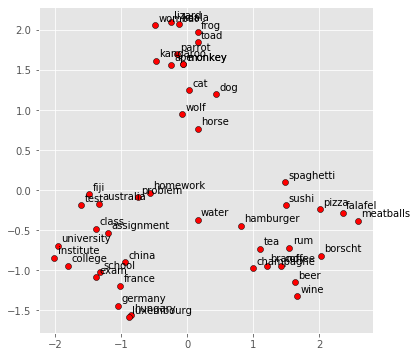

In [17]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

# spaCy

In [18]:
!pip install spacy

     |████████████████████████████████| 10.1 MB 1.5 MB/s eta 0:00:01    |█▉                              | 593 kB 1.4 MB/s eta 0:00:07     |██████████████████████▋         | 7.1 MB 748 kB/s eta 0:00:04     |██████████████████████████████▌ | 9.6 MB 1.5 MB/s eta 0:00:01     |████████████████████████████████| 10.1 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 5.9 MB/s  eta 0:00:01
     |████████████████████████████████| 182 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 211 kB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 5.1 MB/s eta 0:00:01
  Created wheel for wasabi: filename=wasabi-0.7.0-py3-none-any.whl size=20831 sha256=eb1558d39a25d2c5b0601957f8245933cade64feae086079c4ad0965554c45cf
  Stored in directory: /Users/samraykhman/Library/Caches/pip/wheels/68/38/40/b82a00fbe88220b7fd467c29a001

In [19]:
!pip install tqdm

In [20]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 50.8 MB 1.0 MB/s eta 0:00:01    |██▏                             | 3.4 MB 1.6 MB/s eta 0:00:30     |█████▎                          | 8.3 MB 1.6 MB/s eta 0:00:27     |████████▊                       | 13.8 MB 3.5 MB/s eta 0:00:11     |███████████▎                    | 17.9 MB 3.5 MB/s eta 0:00:10     |████████████████████▉           | 33.0 MB 1.0 MB/s eta 0:00:18     |█████████████████████████████   | 45.9 MB 1.0 MB/s eta 0:00:05     |██████████████████████████████▏ | 47.8 MB 1.0 MB/s eta 0:00:03�██████████▏| 49.5 MB 1.0 MB/s eta 0:00:02
  Created wheel for en-core-web-md: filename=en_core_web_md-2.3.0-py3-none-any.whl size=50921514 sha256=47dccba1bceb6ef46c13721a80ed24f376442d91c85fdb28b79bc84f78a30ada
  Stored in directory: /private/var/folders/75/2z9kpn5d6mj79sg1n0j19_7w0000gn/T/pip-ephem-wheel-cache-xpjyiqmq/wheels/a9/30/7d/40a0d13f1ddae5b6398c9f407391942152348eb9eae62fa21e
Successfully built en-core-web-md
✔ Download and installation success

In [21]:
import spacy
import pandas as pd
import numpy as np
from tqdm import tqdm

In [23]:
tqdm.pandas()

In [22]:
df = pd.read_csv("yelp.csv")

In [24]:
df.head()


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [25]:
df.shape

(10000, 10)

## spaCy Pipeline

In [26]:
nlp = spacy.load('en_core_web_md')
# english core web medium
# core data trained medium on the web and in english

In [27]:
df['spacy'] = df.text.progress_apply(lambda x: nlp(x))

100%|██████████| 10000/10000 [05:40<00:00, 29.39it/s]


#### each document in the corpus is a doc object containing individual token objects

In [30]:
df.spacy[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!

In [31]:
df.spacy[0][0]

My

In [32]:
doc = df.spacy[0]

In [34]:
doc

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!

In [33]:
#weod is me
doc[3].is_stop

True

In [36]:
doc.vector

array([-2.16472726e-02,  1.38191238e-01, -1.06210820e-01, -7.80636594e-02,
        5.61806038e-02,  6.08623475e-02, -3.80515819e-03, -1.12673543e-01,
       -3.38070281e-02,  2.10151386e+00, -1.73609957e-01,  1.19751193e-01,
        3.50309163e-02, -6.69298396e-02, -1.05082646e-01, -1.17402479e-01,
       -1.16695091e-01,  1.02826262e+00, -1.57375470e-01, -2.55518742e-02,
       -6.61128107e-03, -6.39689639e-02, -2.30317339e-02, -9.03448928e-03,
       -2.29081046e-03, -1.33597646e-02, -7.41439983e-02, -9.14439410e-02,
        1.05163408e-02, -1.64022028e-01, -4.69215848e-02,  1.09594710e-01,
       -1.79926567e-02,  3.67425978e-02,  5.61799668e-03, -6.92143366e-02,
        2.06234418e-02,  1.75198819e-02, -6.45311698e-02, -1.49663622e-02,
        6.39529200e-03,  3.73507850e-02,  1.52204772e-02, -7.17922077e-02,
        1.03556134e-01,  1.43605277e-01, -1.83414057e-01,  1.27725322e-02,
        2.50832606e-02,  2.44922079e-02, -4.45213169e-02,  2.43482795e-02,
       -1.14679057e-02, -

#### part of speach tagging

In [40]:
doc[3].pos_

'PRON'

#### vector from loaded language model

In [ ]:
#stop words HAVE a vector representation
doc[3].vector

#### vector representation of document (avg of all word vectors in doc)

In [41]:
doc.vector_norm

3.2036364011442964

#### sentance splitting in document

In [42]:
[sents for sents in doc.sents]

[My wife took me here on my birthday for breakfast and it was excellent.  ,
 The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  ,
 Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  ,
 It looked like the place fills up pretty quickly,
 so the earlier you get here the better.
 ,
 Do yourself a favor and get their Bloody Mary.  ,
 It was phenomenal and simply the best I've ever had.  ,
 I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  ,
 It was amazing.
 ,
 While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet,
 and it was tasty and delicious.  ,
 It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  ,
 It was the best "toast" I've ever had.
 ,
 Anyway, I can't wait to go back!]

#### document similarity

In [43]:
doc_2 = df.spacy[1]
doc.similarity(doc_2)

0.9821754392705216

In [ ]:
doc

### see documentation for all you can do
* https://spacy.io/api/token
* https://spacy.io/api/doc

In [44]:
pd.DataFrame(np.vstack([x.vector for x in df.spacy]))

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.021647,0.138191,-0.106211,-0.078064,0.056181,0.060862,-0.003805,-0.112674,-0.033807,2.101514,...,-0.136959,0.051397,0.018642,-0.023069,0.023127,-0.044228,0.049466,-0.054665,0.042870,0.086430
1,-0.051446,0.174888,-0.162487,-0.085476,0.075221,0.077776,0.023618,-0.094539,0.011515,2.291694,...,-0.185593,0.048113,-0.003736,-0.029323,0.014807,-0.067929,-0.012392,-0.065273,0.063565,0.102081
2,0.017356,0.126895,-0.039717,-0.133329,0.094522,0.094641,0.031455,-0.209612,-0.031536,1.723231,...,-0.226321,0.145408,-0.109102,-0.080141,0.077363,-0.122503,0.094507,-0.145394,0.001237,0.178629
3,0.060860,0.164606,-0.154045,-0.168020,0.138500,0.092502,-0.002123,-0.076254,-0.074994,1.953031,...,-0.180692,-0.032520,0.012061,-0.062361,-0.013487,0.018939,0.078037,-0.067532,-0.028504,0.090960
4,-0.095067,0.196053,-0.222208,-0.049087,0.052358,-0.010961,0.008600,-0.170744,-0.042944,2.149826,...,-0.194802,0.040638,-0.044806,-0.043795,0.094823,-0.067053,-0.022288,-0.071459,0.071956,0.073355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.075224,0.134890,-0.089058,-0.109522,0.056692,0.149972,-0.031459,-0.069323,-0.004701,1.914595,...,-0.112275,0.041639,-0.041451,-0.033929,-0.055093,-0.020203,0.021392,-0.192331,0.043283,0.105996
9996,-0.021209,0.151835,-0.112525,-0.122594,0.096538,0.058507,0.037832,-0.138415,-0.004357,2.119311,...,-0.134819,0.032786,-0.051842,-0.048212,0.020107,-0.043680,0.014316,-0.068673,0.009537,0.125834
9997,-0.030904,0.165316,-0.102100,-0.127558,0.130750,0.056111,0.000408,-0.088597,0.021815,2.139497,...,-0.178942,0.070853,-0.077041,-0.035782,-0.026700,-0.029504,0.013137,-0.100683,0.024946,0.108802
9998,-0.026898,0.144509,-0.164131,-0.081958,0.082170,-0.037320,0.030681,-0.165972,-0.023817,2.318492,...,-0.177542,-0.039687,0.011728,-0.033147,0.080831,-0.011535,-0.033406,-0.053590,0.045518,0.094528
